<a href="https://colab.research.google.com/github/seulkioh91/pythonbasic/blob/main/20210609_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils.testing import all_estimators

import warnings
iris_data=pd.read_csv("iris.csv")


In [20]:
warnings.filterwarnings('ignore')

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기 
y = iris_data.loc[:,"Name"]
x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# 학습 전용과 테스트 전용 분리하기 
warnings.filterwarnings('ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# classifier 알고리즘 모두 추출하기--- (*1)
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

for(name, algorithm) in allAlgorithms:
    # 각 알고리즘 객체 생성하기 --- (*2)
    clf = algorithm()

    # 학습하고 평가하기 --- (*3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name,"의 정답률 = " , accuracy_score(y_test, y_pred))

AdaBoostClassifier 의 정답률 =  0.9
BaggingClassifier 의 정답률 =  0.9333333333333333
BernoulliNB 의 정답률 =  0.26666666666666666
CalibratedClassifierCV 의 정답률 =  0.9
CategoricalNB 의 정답률 =  0.8666666666666667


ValueError: ignored

In [21]:
import pandas as pd
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import cross_val_score

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기 
y = iris_data.loc[:,"Name"]
x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# classifier 알고리즘 모두 추출하기
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

# K-분할 크로스 밸리데이션 전용 객체 --- (*1)
kfold_cv = KFold(n_splits=5, shuffle=True)

for(name, algorithm) in allAlgorithms:
    # 각 알고리즘 객체 생성하기
    clf = algorithm()

    # score 메서드를 가진 클래스를 대상으로 하기--- (*2)
    if hasattr(clf,"score"):
        
        # 크로스 밸리데이션--- (*3)
        scores = cross_val_score(clf, x, y, cv=kfold_cv)
        print(name,"의 정답률=")
        print(scores)

AdaBoostClassifier 의 정답률=
[0.93333333 0.96666667 0.96666667 0.86666667 0.96666667]
BaggingClassifier 의 정답률=
[0.93333333 0.96666667 0.96666667 0.93333333 0.96666667]
BernoulliNB 의 정답률=
[0.16666667 0.26666667 0.23333333 0.3        0.3       ]
CalibratedClassifierCV 의 정답률=
[0.83333333 1.         0.96666667 0.8        0.86666667]
CategoricalNB 의 정답률=
[0.86666667 0.96666667 0.9        0.9        1.        ]
CheckingClassifier 의 정답률=
[nan nan nan nan nan]


TypeError: ignored

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y = iris_data.loc[:,"Name"]
x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# 학습 전용과 테스트 전용 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# 그리드 서치에서 사용할 매개 변수 --- (*1)
parameters = [
    {"C": [1, 10, 100, 1000], "kernel":["linear"]},
    {"C": [1, 10, 100, 1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel":["sigmoid"], "gamma": [0.001, 0.0001]}
]

# 그리드 서치 --- (*2)
kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV( SVC(), parameters, cv=kfold_cv)
clf.fit(x_train, y_train)
print("최적의 매개 변수 = ", clf.best_estimator_)

# 최적의 매개 변수로 평가하기 --- (*3)
y_pred = clf.predict(x_test)
print("최종 정답률 = " , accuracy_score(y_test, y_pred))

최적의 매개 변수 =  SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
최종 정답률 =  1.0


In [23]:
import numpy as np

a=np.array([1,2,3,4,5])
print(a)
print(type(a))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [25]:
b=np.array([[1,2,3],[4,5,6]])
print(b)

[[1 2 3]
 [4 5 6]]


In [26]:
print(np.arange(5))

[0 1 2 3 4]


In [27]:
print(np.arange(2,9))

[2 3 4 5 6 7 8]


In [28]:
print(np.arange(5,8,0.5))

[5.  5.5 6.  6.5 7.  7.5]


In [31]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
print(np.zeros((3,2)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [34]:
print(np.ones(10))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
print(np.ones((3,2)))

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [36]:
print(np.arange(5))

[0 1 2 3 4]


In [37]:
print(np.arange(2,9))

[2 3 4 5 6 7 8]


In [39]:
print(np.arange(5,8,0.5))

[5.  5.5 6.  6.5 7.  7.5]


In [41]:
b=a*2

In [42]:
print(b)

[ 2  4  6  8 10]


In [43]:
x=np.arange(10)

In [44]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
y=3*x+5;

In [48]:
y

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

In [49]:
a=np.array([[1,2,3].[4,5,6]])
print(a.shape)

SyntaxError: ignored

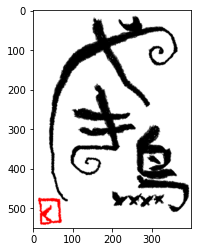

In [57]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("test.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

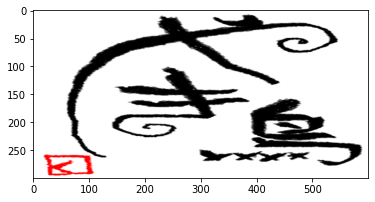

In [58]:
im2=cv2.resize(img,(600,300))
cv2.imwrite("out-resize.png",im2)

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

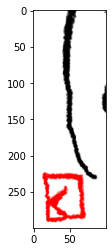

In [63]:
im2=img[250:, 0:100]
# im2=cv2.resize(im2,(400,400))

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

얼굴의 좌표 = 158 18 166 166


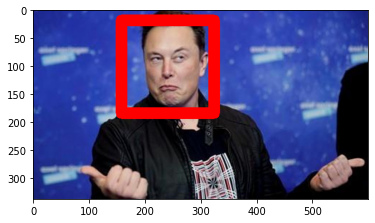

In [66]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("musk.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("musk-face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
""